In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X = iris.data
y = iris.target

In [2]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.2)
print('X_train', X_train.shape)
print('X_val', X_val.shape)
print('X_test', X_test.shape)

X_train (108, 4)
X_val (27, 4)
X_test (15, 4)


In [3]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic',max_iter=800)

In [4]:
from sklearn.metrics import accuracy_score

mlp.fit(X_train, Y_train)
prediksi_val = mlp.predict(X_val)

acc_val = accuracy_score(Y_val, prediksi_val)
print('Akurasi Validasi Training ANN:', acc_val)

Akurasi Validasi Training ANN: 0.9629629629629629


In [5]:
prediksi_test = mlp.predict(X_test)
acc_test = accuracy_score(Y_test, prediksi_test)
print('Akurasi Testing ANN:', acc_test)

Akurasi Testing ANN: 1.0


Akurasi Testing ANN: 1.0


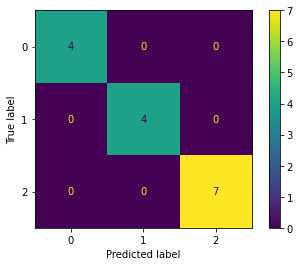

In [6]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

prediksi = mlp.predict(X_test)
plot_confusion_matrix(mlp, X_test, Y_test)
accuracy = accuracy_score(Y_test, prediksi)
print('Akurasi Testing ANN:', accuracy)

In [7]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train,3)
Y_val = to_categorical(Y_val,3)
Y_test = to_categorical(Y_test,3)

In [8]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

In [9]:
model.fit(X_train,Y_train,epochs=100,batch_size=5,validation_data=(X_val,Y_val))

Epoch 1/100
22/22 [==============================] - 5s 71ms/step - loss: 1.1989 - acc: 0.2870 - val_loss: 1.0713 - val_acc: 0.2593
Epoch 2/100
22/22 [==============================] - 0s 12ms/step - loss: 0.9949 - acc: 0.3796 - val_loss: 0.9462 - val_acc: 0.5556
Epoch 3/100
22/22 [==============================] - 0s 10ms/step - loss: 0.8892 - acc: 0.6204 - val_loss: 0.8417 - val_acc: 0.5556
Epoch 4/100
22/22 [==============================] - 0s 11ms/step - loss: 0.7577 - acc: 0.6852 - val_loss: 0.7650 - val_acc: 0.5556
Epoch 5/100
22/22 [==============================] - 0s 13ms/step - loss: 0.7028 - acc: 0.7407 - val_loss: 0.6917 - val_acc: 0.7778
Epoch 6/100
22/22 [==============================] - 0s 18ms/step - loss: 0.6484 - acc: 0.7037 - val_loss: 0.6720 - val_acc: 0.5556
Epoch 7/100
22/22 [==============================] - 0s 16ms/step - loss: 0.5806 - acc: 0.9167 - val_loss: 0.5940 - val_acc: 0.9259
Epoch 8/100
22/22 [==============================] - 0s 16ms/step - loss: 0.

Epoch 63/100
22/22 [==============================] - 0s 8ms/step - loss: 0.1400 - acc: 0.9444 - val_loss: 0.1711 - val_acc: 0.9630
Epoch 64/100
22/22 [==============================] - 0s 12ms/step - loss: 0.1590 - acc: 0.9444 - val_loss: 0.1451 - val_acc: 0.9630
Epoch 65/100
22/22 [==============================] - 0s 7ms/step - loss: 0.1291 - acc: 0.9630 - val_loss: 0.1437 - val_acc: 0.9630
Epoch 66/100
22/22 [==============================] - 0s 6ms/step - loss: 0.1386 - acc: 0.9630 - val_loss: 0.1343 - val_acc: 0.9630
Epoch 67/100
22/22 [==============================] - 0s 6ms/step - loss: 0.1237 - acc: 0.9630 - val_loss: 0.1469 - val_acc: 0.9630
Epoch 68/100
22/22 [==============================] - 0s 6ms/step - loss: 0.1298 - acc: 0.9630 - val_loss: 0.1526 - val_acc: 0.9630
Epoch 69/100
22/22 [==============================] - 0s 6ms/step - loss: 0.1423 - acc: 0.9444 - val_loss: 0.1627 - val_acc: 0.9630
Epoch 70/100
22/22 [==============================] - 0s 13ms/step - loss: 

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


In [11]:
from sklearn.metrics import confusion_matrix

loss, accuracy = model.evaluate(X_test, Y_test)
print('Akurasi Testing ANN:', accuracy)


1/1 [==============================] - 0s 348ms/step - loss: 0.0487 - acc: 1.0000
Akurasi Testing ANN: 1.0
